# Question 01


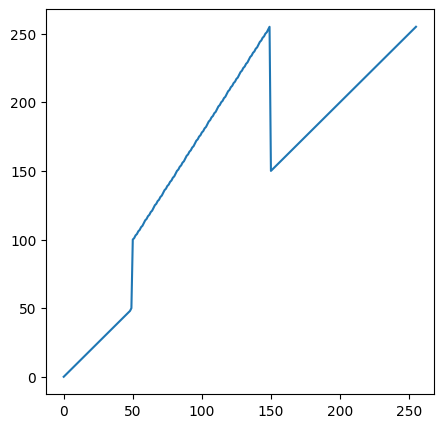

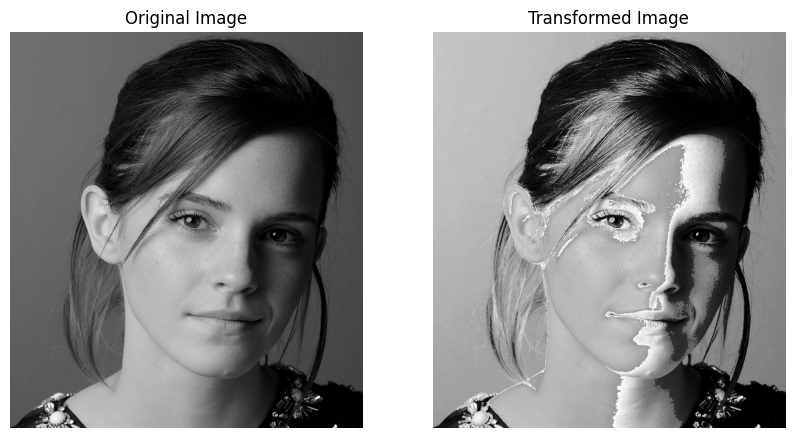

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

t1 = np.linspace(0,50,50).astype('uint8')
t2 = np.linspace(100,255,100).astype('uint8')
t3 = np.linspace(150,255,106).astype('uint8')

transform = np.concatenate((t1,t2,t3),axis=0).astype('uint8')

plt.figure(figsize=(5,5))
plt.plot(transform)
plt.show()

image_orig = cv.imread(r'E:\campus\5.sem5\image processing\A0\emma.jpg',cv.IMREAD_GRAYSCALE)
image_transformed = transform[image_orig]

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)  
plt.imshow(image_orig,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_transformed,cmap='gray')
plt.title('Transformed Image')
plt.axis('off')
plt.show()


# Question 02

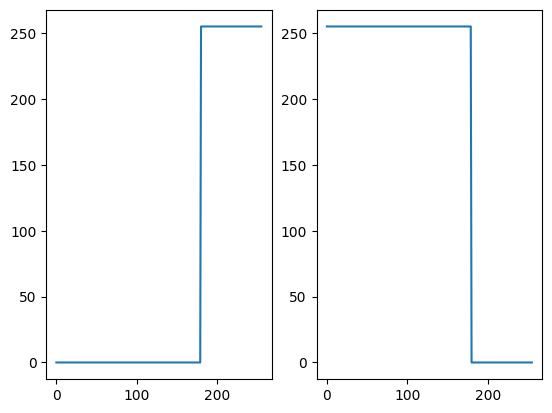

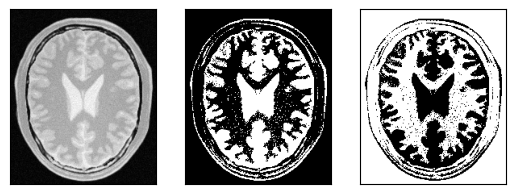

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

brain_proton = cv.imread(r'E:\campus\5.sem5\image processing\A0\BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)

t1 = np.linspace(0,0,180).astype('uint8')
t2 = np.linspace(255,255,76).astype('uint8')
transform1 = np.concatenate((t1,t2),axis=0)


t3 = np.linspace(255,255,180).astype('uint8')
t4 = np.linspace(0,0,76).astype('uint8')
transform2 = np.concatenate((t3,t4),axis=0)

white_matter = transform1[brain_proton]
gray_matter = transform2[brain_proton]

fig,ax = plt.subplots(1,2)
ax[0].plot(transform1)
ax[1].plot(transform2)

fig,ax = plt.subplots(1,3)

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[0].imshow(brain_proton,cmap='gray')
ax[1].imshow(white_matter,cmap='gray')
ax[2].imshow(gray_matter,cmap='gray')

# Question 03

Text(0.5, 1.0, 'Gamma Corrected Image Histogram')

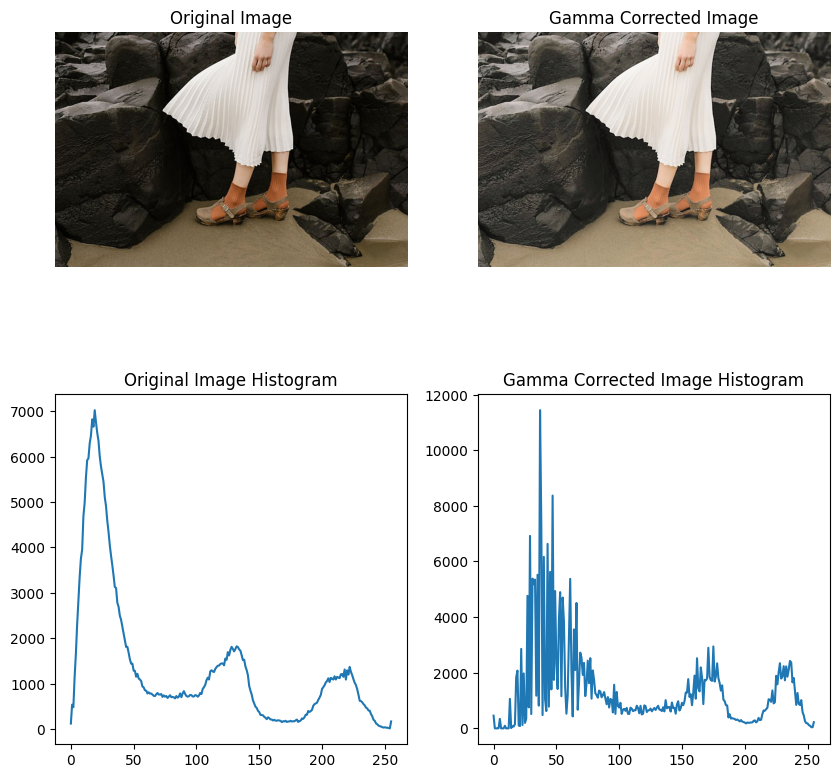

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'E:\campus\5.sem5\image processing\A0\highlights_and_shadows.jpg',cv.IMREAD_COLOR)
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

LAB_image = cv.cvtColor(image,cv.COLOR_RGB2LAB)

gamma = 0.6
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype('uint8')
LAB_image[:,:,0] = cv.LUT(LAB_image[:,:,0], table)
LAB_image = cv.cvtColor(LAB_image,cv.COLOR_LAB2RGB).astype('uint8')

hist_original = cv.calcHist([image],[0],None,[256],[0,256])
hist_gamma_corrected = cv.calcHist([LAB_image],[0],None,[256],[0,256])

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(LAB_image)
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(hist_original)
plt.title('Original Image Histogram')

plt.subplot(2,2,4)
plt.plot(hist_gamma_corrected)
plt.title('Gamma Corrected Image Histogram')


# Question 04

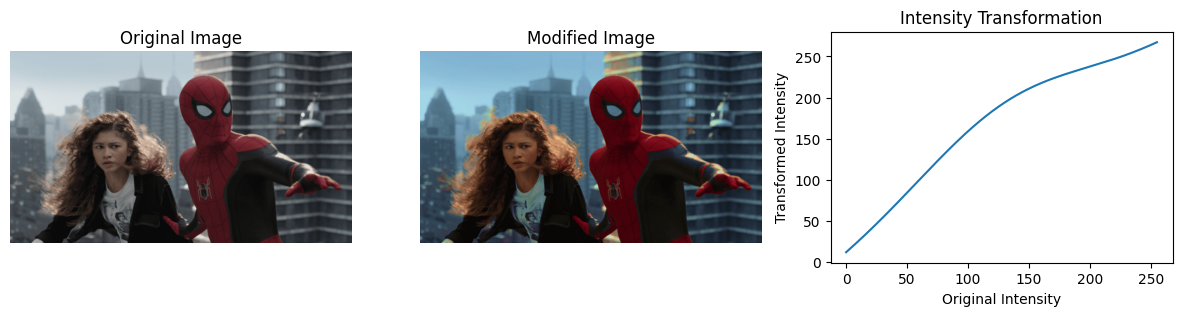

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'E:\campus\5.sem5\image processing\A0\spider.png', cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

saturation = image_hsv[:, :, 1]

sigma = 70
a = 0.5

def intensity_transform(x):
    return x + (a * 128) * np.exp(-((x - 128) ** 2) / (2 * (sigma ** 2)))

saturation_transformed = intensity_transform(saturation)

modified_image_hsv = image_hsv.copy()
modified_image_hsv[:, :, 1] = saturation_transformed

modified_image_rgb = cv.cvtColor(modified_image_hsv, cv.COLOR_HSV2RGB)

y = np.arange(0, 256)
x = np.arange(0, 256)
y_transformed = intensity_transform(y)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(modified_image_rgb)
plt.title('Modified Image')
plt.axis('off')


plt.subplot(133)
plt.plot(x, y_transformed)
plt.title('Intensity Transformation')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')

plt.show()


# Question 05

Text(0.5, 1.0, 'Equalized Image Histogram')

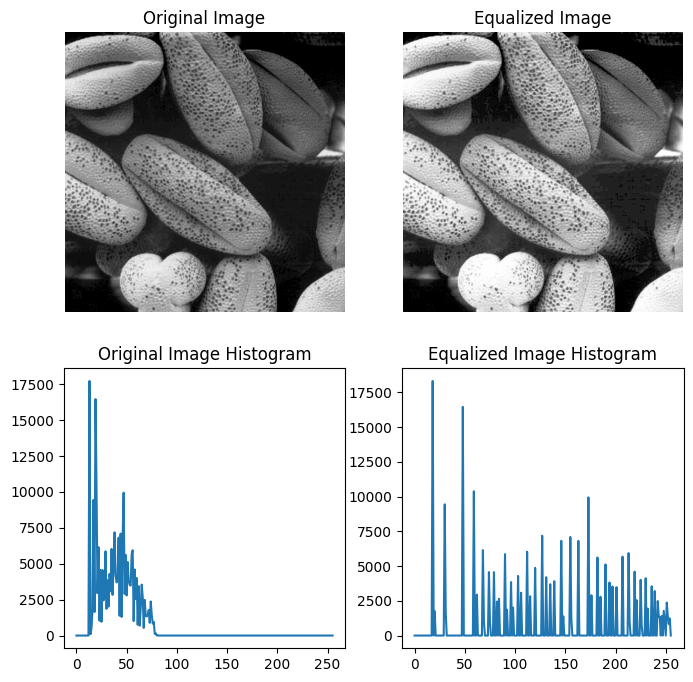

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'E:\campus\5.sem5\image processing\A0\shells.tif', cv.IMREAD_GRAYSCALE)

hist_original = cv.calcHist([image],[0],None,[256],[0,256])

cdf = np.zeros(256)
cdf[0] = float(hist_original[0])
for i in range(1,256):
    cdf[i] = float(cdf[i-1] + hist_original[i])

cdf_normalized = cdf * 255 / cdf.max()

image_equalized = cdf_normalized[image].astype('uint8') 


hist_equalized = cv.calcHist([image_equalized],[0],None,[256],[0,256])

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(image_equalized,cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.plot(hist_original)
plt.title('Original Image Histogram')

plt.subplot(2,2,4)
plt.plot(hist_equalized)
plt.title('Equalized Image Histogram')



# Question 06

Text(0.5, 1.0, 'Histograms of Foreground')

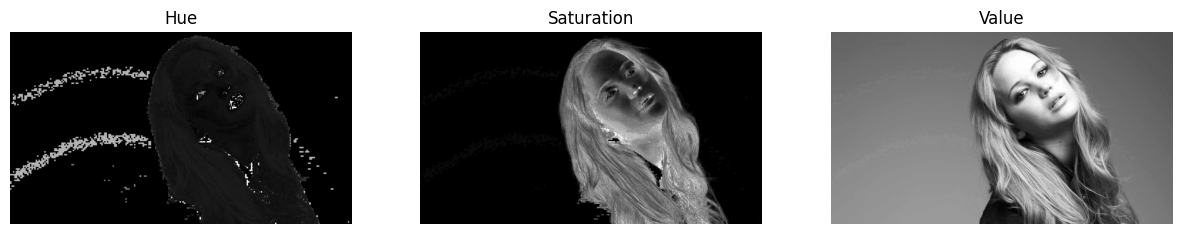

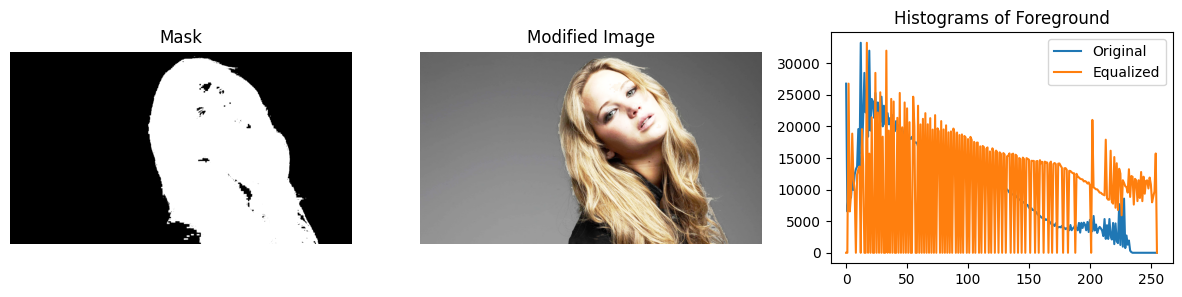

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'E:\campus\5.sem5\image processing\A0\jeniffer.jpg', cv.IMREAD_COLOR)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_image)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue')
plt.axis('off')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value')
plt.axis('off')


t1,mask = cv.threshold(saturation, 20, 255, cv.THRESH_BINARY)

foreground = cv.bitwise_and(image, image, mask=mask)
hist_foreground = cv.calcHist([foreground], [0], mask, [256], [0, 256])

cdf = np.cumsum(hist_foreground)
cdf_normalized = cdf * 255 / cdf.max()
foreground_equalized = cdf_normalized[foreground].astype('uint8')
hist_foreground_equalized = cv.calcHist([foreground_equalized], [0], mask, [256], [0, 256])

background = cv.subtract(image, foreground)

modified_image = cv.add(background, foreground_equalized)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv.cvtColor(modified_image ,cv.COLOR_BGR2RGB))
plt.title('Modified Image')
plt.axis('off')

plt.subplot(133)
plt.plot(hist_foreground)
plt.plot(hist_foreground_equalized)
plt.legend(['Original', 'Equalized'])
plt.title('Histograms of Foreground')





# Question 07

(-0.5, 363.5, 379.5, -0.5)

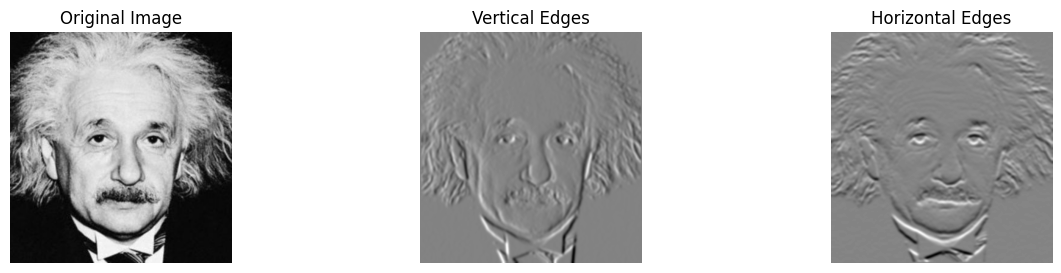

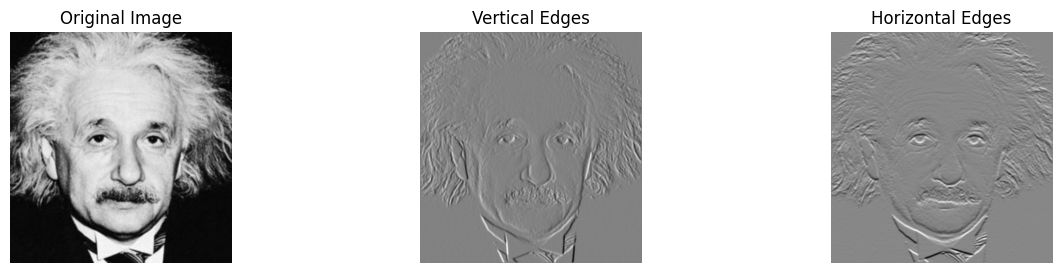

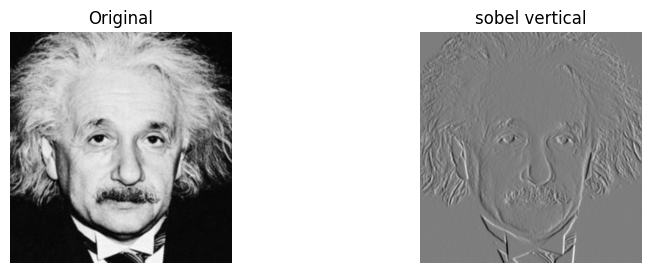

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math

image = cv.imread(r'E:\campus\5.sem5\image processing\A0\einstein.png', cv.IMREAD_GRAYSCALE)

sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=15)
sobely = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=15)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(sobelx, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(133)
plt.imshow(sobely, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')


#------------My Code-----------------

image = cv.imread(r'E:\campus\5.sem5\image processing\A0\einstein.png', cv.IMREAD_GRAYSCALE)

sobelx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sobelx = np.array(sobelx)
sobely = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
sobely = np.array(sobely)

def filter(image,kernal):
    assert kernal.shape[0]%2 == 1 and kernal.shape[1]%2 == 1
    k_hh , k_hw = math.floor(kernal.shape[0]/2) , math.floor(kernal.shape[1]/2)

    h,w = image.shape[0],image.shape[1]

    image_float = cv.normalize(image.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)

    result = np.zeros(image.shape,'float')

    for m in range(k_hh,h-k_hh):
        for n in range(k_hw,w-k_hw):
            result[m,n] = np.sum(image_float[m-k_hh:m+k_hh+1,n-k_hw:n+k_hw+1].flatten()*kernal.flatten())


    return result


sobelx_image = filter(image,sobelx)
sobely_image = filter(image,sobely)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(sobelx_image, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(133)
plt.imshow(sobely_image, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')


#------------Filter2D-----------------

image = cv.imread(r'E:\campus\5.sem5\image processing\A0\einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)

filter1 = [[1],[2],[1]]
filter1 = np.array(filter1, dtype='float')
filter2 = [[1,0,-1]]
filter2 = np.array(filter2, dtype='float')

filtered1 = cv.filter2D(image, -1, filter1)
filtered2 = cv.filter2D(filtered1, -1, filter2)

plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.imshow(image,cmap='gray')
plt.title('Original')
plt.axis('off')


plt.subplot(132)
plt.imshow(filtered2,cmap='gray')
plt.title('sobel vertical')
plt.axis('off')



# Question 08

255


Text(0.5, 1.0, 'Scaled Original Image')

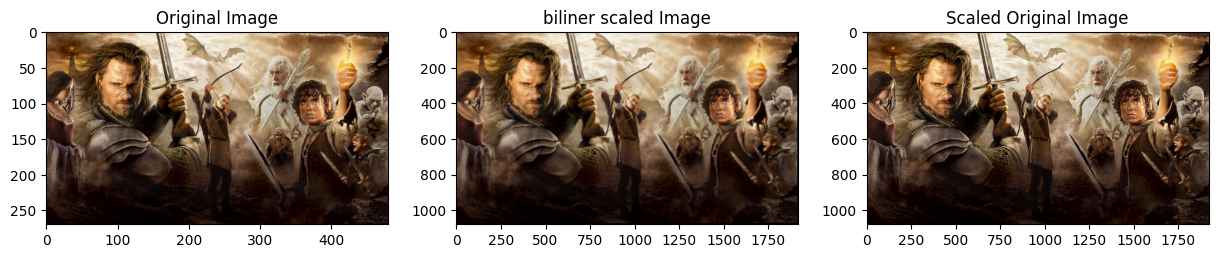

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math

#------------Nearest Neighbour-----------------

image = cv.imread(r'E:\campus\5.sem5\image processing\A0\zooming\im01small.png', cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
scaled_original = cv.imread(r'E:\campus\5.sem5\image processing\A0\zooming\im01.png', cv.IMREAD_COLOR)
scaled_original = cv.cvtColor(scaled_original, cv.COLOR_BGR2RGB)


def scale(image, scale):
    h, w, c = image.shape
    scaled_image = np.zeros((int(h * scale), int(w * scale), c), dtype='uint8')
    for i in range(scaled_image.shape[0]):
        for j in range(scaled_image.shape[1]):
            scaled_image[i, j] = image[int(i / scale), int(j / scale)]
    return scaled_image

scaled_image = scale(image, 4)

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(scaled_image)
plt.title('Scaled Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(scaled_original)
plt.title('Scaled Original Image')
plt.axis('off')


#------------Bilinear Interpolation-----------------

def bilinear_interpolation(image,scale):
    height,width,chanels = image.shape
    bilinear_scaled_image = np.zeros((int(height*scale),int(width*scale),chanels),dtype='uint8')

    for channel in range(chanels):
        for i in range(bilinear_scaled_image.shape[0]):
            for j in range(bilinear_scaled_image.shape[1]):
                x= i/scale
                y= j/scale
                x1 = int(np.floor(x))
                x2 = min(x1+1,height-1)
                y1 = int(np.floor(y))
                y2 = min(y1+1,width-1)

                p1 = image[x1,y1,channel]*(x2-x) + image[x2,y1,channel]*(x-x1)

                p2 = image[x1,y2,channel]*(x2-x) + image[x2,y2,channel]*(x-x1)

                bilinear_scaled_image[i,j,channel] = p1*(y2-y) + p2*(y-y1)
                
            
    return bilinear_scaled_image




bilinear_scaled_image = bilinear_interpolation(image,4)
print(bilinear_scaled_image.max())
plt.figure(figsize=(15, 3))



plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(132)
plt.imshow(bilinear_scaled_image)
plt.title('biliner scaled Image')

plt.subplot(133)
plt.imshow(scaled_original)
plt.title('Scaled Original Image')


# Question 09

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

image = cv.imread(r'E:\campus\5.sem5\image processing\A0\daisy.jpg',cv.IMREAD_COLOR)
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)

mask = np.zeros(image.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,100,600,500)

(mask, bgdModel, fgdModel) = cv.grabCut(image, mask, rect, bgdModel, fgdModel, 8, cv.GC_INIT_WITH_RECT)

output_mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
output_mask = (output_mask*255).astype('uint8')

foreground_image = cv.bitwise_and(image,image,mask=output_mask)
background_image = cv.bitwise_and(image,image,mask=cv.bitwise_not(output_mask))

plt.figure(figsize=(15,15))
plt.subplot(141)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(output_mask,cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(143)
plt.imshow(foreground_image)
plt.title('Foreground')
plt.axis('off')

plt.subplot(144)
plt.imshow(background_image)
plt.title('Background')
plt.axis('off')

blured = cv.GaussianBlur(background_image,(21,21),0)
background_blured = cv.add(foreground_image,blured)


plt.figure(figsize=(15,15))
plt.subplot(141)
plt.imshow(blured)
plt.title('Blured')
plt.axis('off')

plt.subplot(142)
plt.imshow(image)
plt.title('Original')
plt.axis('off')


plt.subplot(143)
plt.imshow(background_blured)
plt.title('Background Blured Image')
plt.axis('off')




